<a href="https://colab.research.google.com/github/igorlysov/Customer-Personality-Analysis/blob/main/Customer_Personality_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task description

---

**Problem Statement**

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

---

**Target**

Need to perform clustering to summarize customer segments.

---

**Attributes**

>  *People*

ID: Customer's unique identifier

Year_Birth: Customer's birth year

Education: Customer's education level

Marital_Status: Customer's marital status

Income: Customer's yearly household income

Kidhome: Number of children in customer's household

Teenhome: Number of teenagers in customer's household

Dt_Customer: Date of customer's enrollment with the company

Recency: Number of days since customer's last purchase

Complain: 1 if the customer complained in the last 2 years, 0 otherwise

>   *Products*

MntWines: Amount spent on wine in last 2 years

MntFruits: Amount spent on fruits in last 2 years

MntMeatProducts: Amount spent on meat in last 2 years

MntFishProducts: Amount spent on fish in last 2 years

MntSweetProducts: Amount spent on sweets in last 2 years

MntGoldProds: Amount spent on gold in last 2 years

>   *Promotion*

NumDealsPurchases: Number of purchases made with a discount

AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise

AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise

AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise

Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

>   *Place*

NumWebPurchases: Number of purchases made through the company’s website

NumCatalogPurchases: Number of purchases made using a catalogue

NumStorePurchases: Number of purchases made directly in stores

NumWebVisitsMonth: Number of visits to company’s website in the last month

# Importing the dataset

In [1]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [61]:
data = pd.read_csv('/content/drive/MyDrive/marketing_campaign.csv', sep='\t')
print("The amount of datapoints is", len(data))
data.head()

The amount of datapoints is 2240


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [4]:
data.shape

(2240, 29)

# Data Engineering

1. Data Cleaning
2. Feature Engineering

Our dataset consists of 2240 datapoints and 29 attributes, which can be categorized into 4 following groups:

**People:**
> ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, Complain

**Products:**
> MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds

**Promotion:**
> NumDealsPurchases, AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, Response

**Place:**
> NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth


In [5]:
# Information about every feature
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

**As we can see there are a few problems:**

1. Missing values in **"Income"** (2216/2240) 
2. **"Dt_Customer"**, which illustrates a date of customer's enrollment with the company, is not a date actually. It's type is also "object"
3. Categorial features, which type is marked as "object" (except **"Dt_Customer"**)

In [62]:
# Clean rows with missing values
data = data.dropna()
print("The amount of datapoints is", len(data))
data.head()

The amount of datapoints is 2216


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [23]:
data.shape

(2216, 29)

In [63]:
# Convert "Dt_Customers" to data-type
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])
dates_array = []
for date in data["Dt_Customer"]:
  date = date.date()
  dates_array.append(date)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-nul

Let's create new feature called **"Days_Customer"**, that illustrates the number of days a customer is registered in the database.

In [64]:
last_date = max(dates_array)
customer_for_days = []
for date in dates_array:
  days_number = last_date - date
  customer_for_days.append(days_number)
data["Days_Customer"] = customer_for_days
data["Days_Customer"] = pd.to_numeric(data["Days_Customer"], errors='coerce')

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-nul

In [7]:
# Let's look at categorial features
data["Marital_Status"].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [47]:
data["Education"].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

Now, we can re-encode our categorial features by grouping them. For example, we can split all the values of **"Marital_Status"** feature into 2 groups: "*Alone*", "*Not alone*"

In [65]:
data["Marital_Status"] = data["Marital_Status"].replace({"Married": "Not alone", "Together": "Not alone", "Single": "Alone", "Divorced": "Alone", "Widow": "Alone", "Alone": "Alone", "Absurd": "Alone", "YOLO": "Alone"})

In [66]:
data["Education"] = data["Education"].replace({"Graduation": "Grad", "PhD": "PostGrad", "Master": "PostGrad", "2n Cycle": "UnderGrad", "Basic": "UnderGrad"})

Data can be simplified by grouping the attributes. Moreover, we can create some features that would be more informative (we can create **"Age"** feature instead of **"Year_Birth"**, for example). After that we can drop the redundant features.

In [67]:
# Adding "Age" feature
data["Age"] = 2021 - data["Year_Birth"]
# Adding "Total_Spent" feature - total amount spent by customer
data["Total_Spent"] = data["MntWines"] + data["MntFruits"] + data["MntMeatProducts"] + data["MntFishProducts"] + data["MntSweetProducts"] + data["MntGoldProds"]
# Adding feature "Children" - total amount of children in customer's family
data["Children"] = data["Kidhome"] + data["Teenhome"]
# Adding feature "Family_Size"
data["Family_Size"] = data["Marital_Status"].replace({"Alone": 1, "Not alone": 2}) + data["Children"]
# Adding feature "Is_Parent"
data["Is_Parent"] = np.where(data["Children"] > 0, 1, 0)

In [62]:
# Let's look at our data
data.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Days_Customer,Age,Total_Spent,Children,Family_Size,Is_Parent
0,5524,1957,Grad,Alone,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,83894400000000000,64,1617,0,0,0
1,2174,1954,Grad,Alone,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,10800000000000000,67,27,2,2,1
2,4141,1965,Grad,Not alone,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,40780800000000000,56,776,0,1,0
3,6182,1984,Grad,Not alone,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,5616000000000000,37,53,1,2,1
4,5324,1981,PostGrad,Not alone,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,27734400000000000,40,422,1,2,1
5,7446,1967,PostGrad,Not alone,62513.0,0,1,2013-09-09,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0,39139200000000000,54,716,1,2,1
6,965,1971,Grad,Alone,55635.0,0,1,2012-11-13,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0,65059200000000000,50,590,1,1,1
7,6177,1985,PostGrad,Not alone,33454.0,1,0,2013-08-05,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0,42163200000000000,36,169,1,2,1
8,4855,1974,PostGrad,Not alone,30351.0,1,0,2013-06-06,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1,47347200000000000,47,46,1,2,1
9,5899,1950,PostGrad,Not alone,5648.0,1,1,2014-03-13,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0,23155200000000000,71,49,2,3,1


It can be seen that **"Z_CostContact"** and **"Z_Revenue"** have only one repating value. Let's check this

In [63]:
data["Z_CostContact"].value_counts()

3    2216
Name: Z_CostContact, dtype: int64

In [64]:
data["Z_Revenue"].value_counts()

11    2216
Name: Z_Revenue, dtype: int64

In [65]:
# Check to be sure
data["Complain"].value_counts()

0    2195
1      21
Name: Complain, dtype: int64

In [68]:
# Drop the redundant features
to_drop = ["Z_CostContact", "Z_Revenue", "Year_Birth", "Dt_Customer", "ID"]
data = data.drop(to_drop, axis=1)

In [68]:
data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Days_Customer,Age,Total_Spent,Children,Family_Size,Is_Parent
0,Grad,Alone,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,83894400000000000,64,1617,0,0,0
1,Grad,Alone,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,10800000000000000,67,27,2,2,1
2,Grad,Not alone,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,40780800000000000,56,776,0,1,0
3,Grad,Not alone,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,5616000000000000,37,53,1,2,1
4,PostGrad,Not alone,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,27734400000000000,40,422,1,2,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   object 
 1   Marital_Status       2216 non-null   object 
 2   Income               2216 non-null   float64
 3   Kidhome              2216 non-null   int64  
 4   Teenhome             2216 non-null   int64  
 5   Recency              2216 non-null   int64  
 6   MntWines             2216 non-null   int64  
 7   MntFruits            2216 non-null   int64  
 8   MntMeatProducts      2216 non-null   int64  
 9   MntFishProducts      2216 non-null   int64  
 10  MntSweetProducts     2216 non-null   int64  
 11  MntGoldProds         2216 non-null   int64  
 12  NumDealsPurchases    2216 non-null   int64  
 13  NumWebPurchases      2216 non-null   int64  
 14  NumCatalogPurchases  2216 non-null   int64  
 15  NumStorePurchases    2216 non-null   i

# Data Preprocessing

1. Label encoding of categorial features
2. Dealing with data outliers
3. Scaling the data

In [69]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

First of all, let's find and encode categorial features

In [70]:
cat_indicator = (data.dtypes == "object")
cat_cols = list(cat_indicator[cat_indicator].index)
# Our categorial features
cat_cols

['Education', 'Marital_Status']

In [71]:
# Encoding categorial features
Encoder = LabelEncoder()
for feature in cat_cols:
  data[feature] = data[[feature]].apply(Encoder.fit_transform)

In [73]:
# Now every feature is numerical
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   int64  
 1   Marital_Status       2216 non-null   int64  
 2   Income               2216 non-null   float64
 3   Kidhome              2216 non-null   int64  
 4   Teenhome             2216 non-null   int64  
 5   Recency              2216 non-null   int64  
 6   MntWines             2216 non-null   int64  
 7   MntFruits            2216 non-null   int64  
 8   MntMeatProducts      2216 non-null   int64  
 9   MntFishProducts      2216 non-null   int64  
 10  MntSweetProducts     2216 non-null   int64  
 11  MntGoldProds         2216 non-null   int64  
 12  NumDealsPurchases    2216 non-null   int64  
 13  NumWebPurchases      2216 non-null   int64  
 14  NumCatalogPurchases  2216 non-null   int64  
 15  NumStorePurchases    2216 non-null   i

Let's look at some statistical values and try to find outliers

In [76]:
data.describe()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Days_Customer,Age,Total_Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,0.611011,0.645307,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,0.150271,4.423735e+16,52.179603,607.075361,0.947202,1.592509,0.714350
std,0.683469,0.478528,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.357417,2.008532e+16,11.985554,602.900476,0.749062,0.905722,0.451825
min,0.000000,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,25.000000,5.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.937600e+16,44.000000,69.000000,0.000000,1.000000,0.000000
50%,0.000000,1.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.432320e+16,51.000000,396.500000,1.000000,2.000000,1.000000
75%,1.000000,1.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.927040e+16,62.000000,1048.000000,1.000000,2.000000,1.000000
max,2.000000,1.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.184320e+16,128.000000,2525.000000,3.000000,4.000000,1.000000


It seems that max age of 128 years and max income of 666666 are something indicating an existence of the outliers. We can look at our data with a broader view

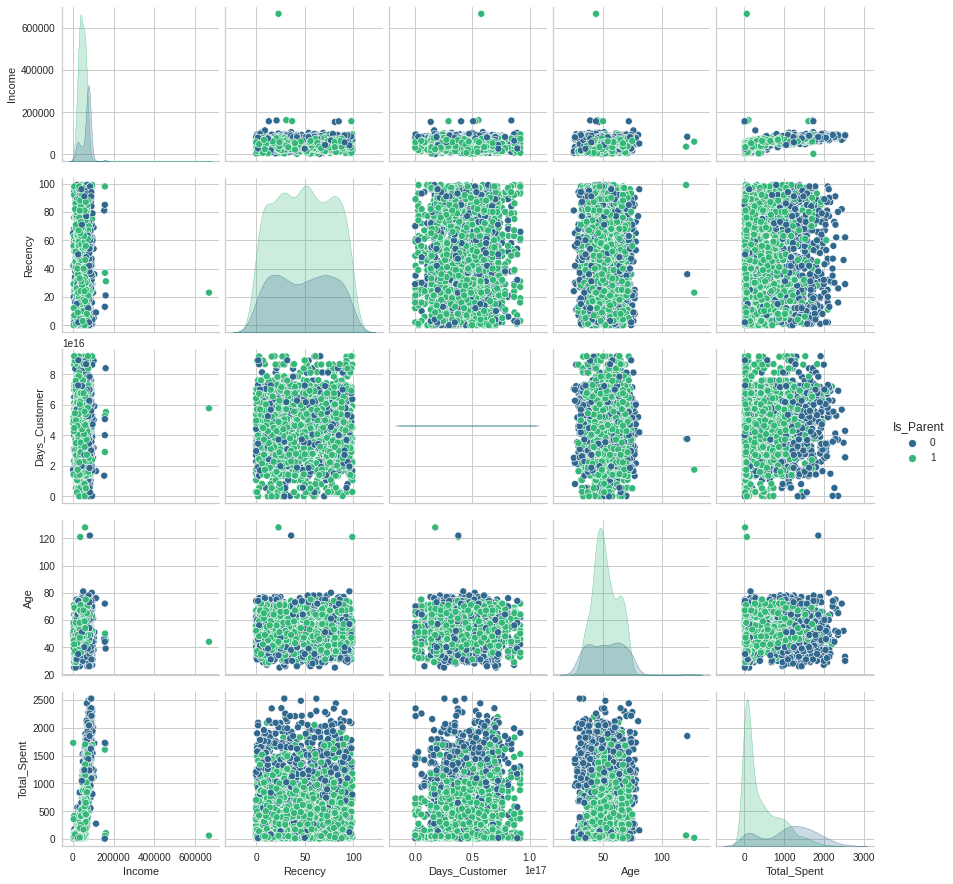

In [72]:
# Select features for Pair plot
to_plot = ["Income", "Recency", "Days_Customer", "Age", "Total_Spent", "Is_Parent"]
sns.pairplot(data[to_plot], hue='Is_Parent', palette="viridis")

It's obvious that there are a few outliers in the **"Income"** and **"Age"** features. Box plot can be more informative

Text(0.5, 1.0, '"Age" Box-plot')

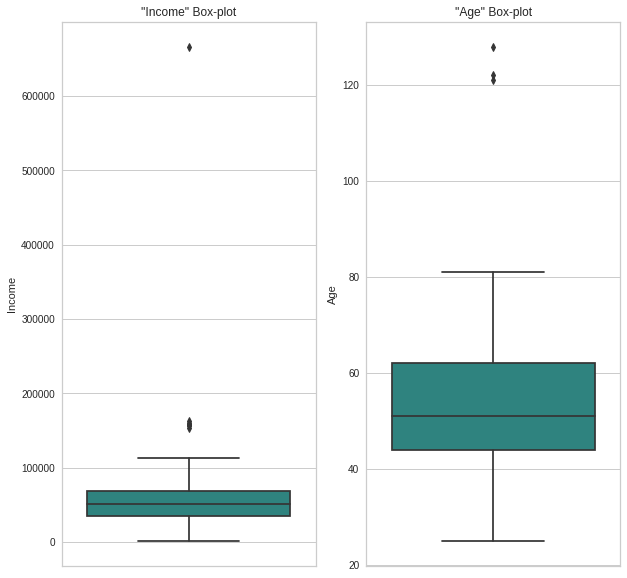

In [73]:
plt.figure(figsize = (10,10))

plt.subplot(1, 2, 1)
sns.boxplot(y = data.Income, palette="viridis")
plt.title("\"Income\" Box-plot")

plt.subplot(1, 2, 2)
sns.boxplot(y = data.Age, palette="viridis")
plt.title("\"Age\" Box-plot")

In [74]:
# Let's define a funtion to find interquantile range borders
def find_IQR(data, column):
  q_25, q_75 = np.quantile(data[column], 0.25), np.quantile(data[column], 0.75)
  IQR = q_75 - q_25
  whiskers_range = IQR * 1.5
  lower, upper = q_25 - whiskers_range, whiskers_range + q_75
  return lower, upper

In [75]:
lower_income, upper_income = find_IQR(data, "Income")
print(lower_income, upper_income)

-14525.5 118350.5


In [76]:
lower_age, upper_age = find_IQR(data, "Age")
print(lower_age, upper_age)

17.0 89.0


In [77]:
# Drop the outliers
data = data[(data["Age"] < upper_age)]
data = data[(data["Income"] < upper_income)]

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2205 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2205 non-null   int64  
 1   Marital_Status       2205 non-null   int64  
 2   Income               2205 non-null   float64
 3   Kidhome              2205 non-null   int64  
 4   Teenhome             2205 non-null   int64  
 5   Recency              2205 non-null   int64  
 6   MntWines             2205 non-null   int64  
 7   MntFruits            2205 non-null   int64  
 8   MntMeatProducts      2205 non-null   int64  
 9   MntFishProducts      2205 non-null   int64  
 10  MntSweetProducts     2205 non-null   int64  
 11  MntGoldProds         2205 non-null   int64  
 12  NumDealsPurchases    2205 non-null   int64  
 13  NumWebPurchases      2205 non-null   int64  
 14  NumCatalogPurchases  2205 non-null   int64  
 15  NumStorePurchases    2205 non-null   i

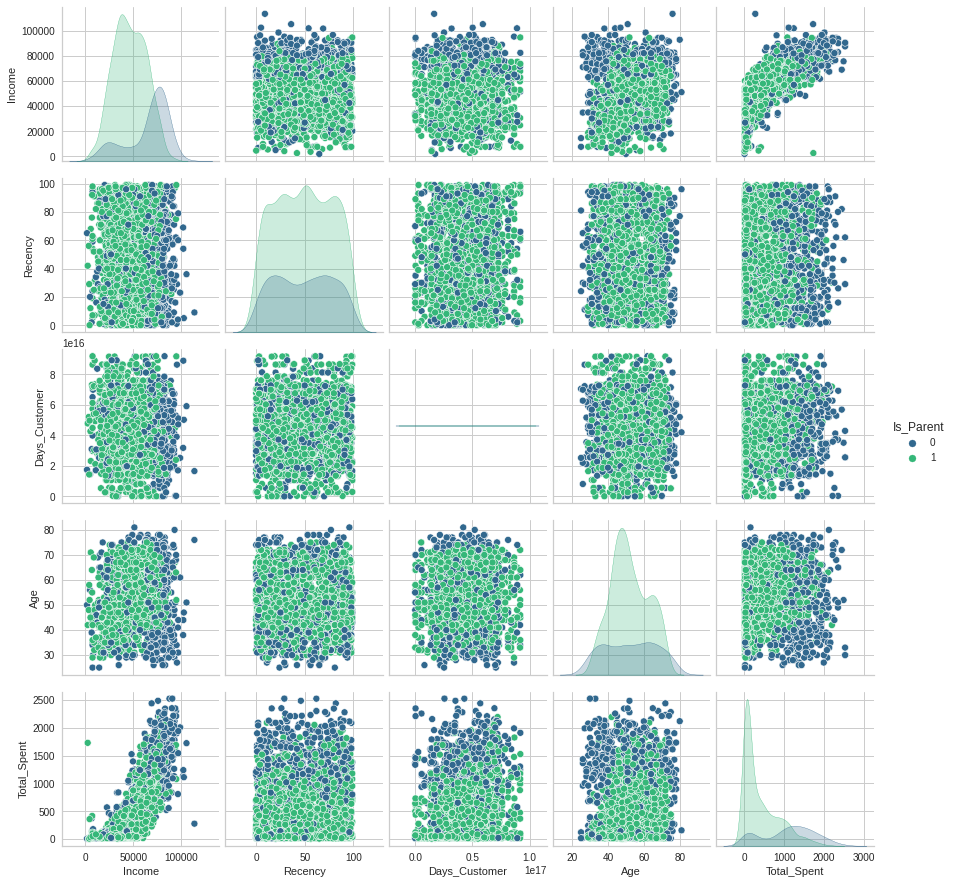

In [78]:
# Let's look at Pair-plot again
sns.pairplot(data[to_plot], hue='Is_Parent', palette="viridis")

Now, it can be seen that there are no outliers. After preprocessing, let's try to look at correlations between features

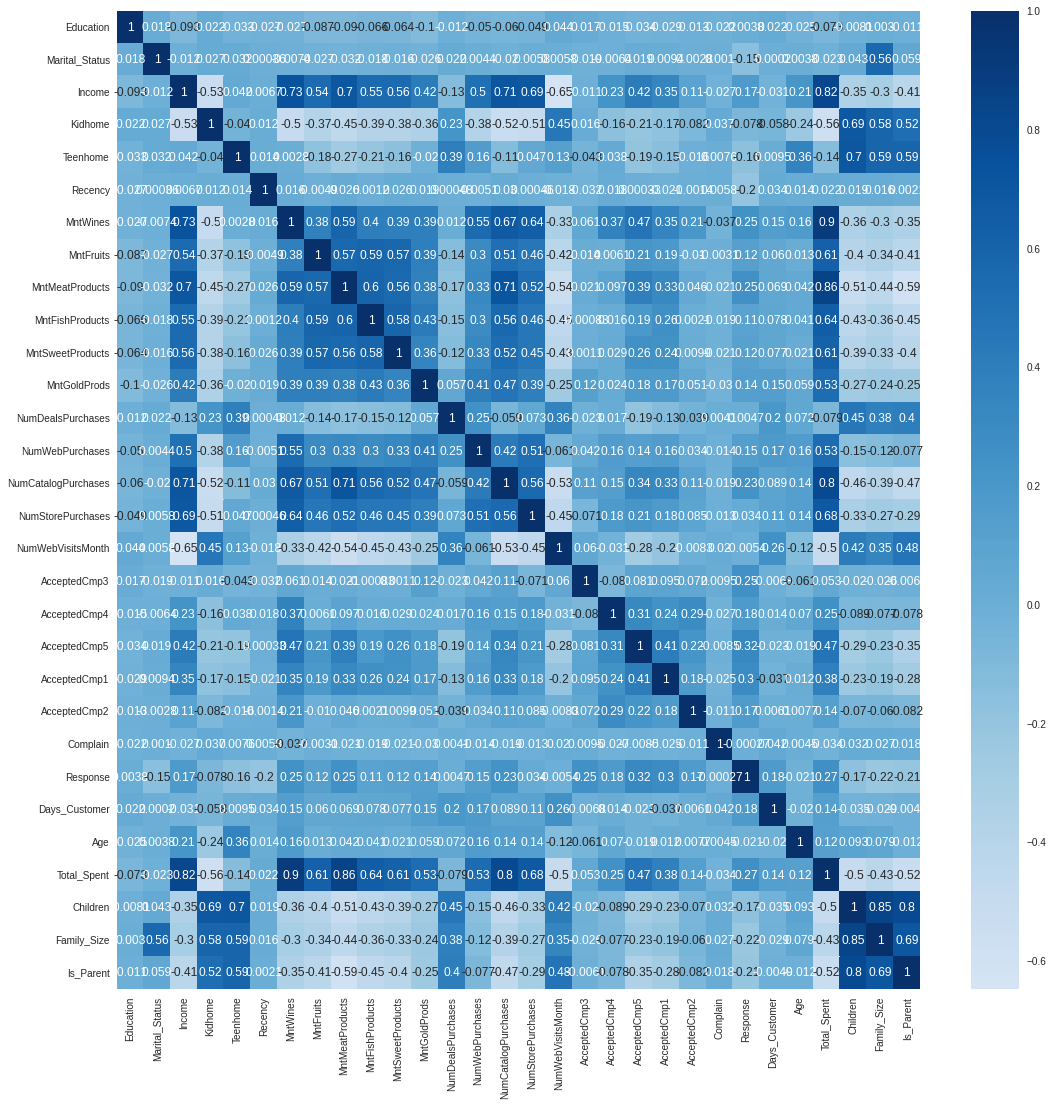

In [79]:
corr_matrix = data.corr()
plt.figure(figsize = (18,18))
sns.heatmap(corr_matrix ,annot=True, center=0, cmap="Blues")

It can be seen that there are lots of dependent features. So that the dimension of the dataset can be reduced and it would make sense.

Firstly, let's drop some obviously redundant features and scale the remaining ones

In [80]:
data_copy = data.copy()

In [81]:
# Drop redundant features 
cols_to_drop = ["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Complain", "Response"]
data_copy = data_copy.drop(cols_to_drop, axis=1)

In [82]:
# Scale the data
Scaler = StandardScaler()
Scaler.fit(data_copy)
data_scaled = pd.DataFrame(Scaler.transform(data_copy), columns= data_copy.columns)

In [28]:
data_scaled.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Days_Customer,Age,Total_Spent,Children,Family_Size,Is_Parent
0,-0.892338,-1.347625,0.314651,-0.823405,-0.930767,0.310830,0.974566,1.548614,1.748400,2.449154,1.480301,0.849556,0.361479,1.424772,2.628526,-0.562650,0.689203,1.974128,1.017189,1.679323,-1.266589,-1.759012,-1.58466
1,-0.892338,-1.347625,-0.254877,1.038757,0.906602,-0.380600,-0.874776,-0.638664,-0.731678,-0.652345,-0.635399,-0.735767,-0.168834,-1.132957,-0.588043,-1.179732,-0.139645,-1.664957,1.273530,-0.963897,1.403420,0.448513,0.63105
2,-0.892338,0.742046,0.965354,-0.823405,-0.930767,-0.795458,0.355155,0.568110,-0.175957,1.336263,-0.149031,-0.039771,-0.699147,1.424772,-0.230646,1.288596,-0.554069,-0.172330,0.333612,0.281242,-1.266589,-0.655250,-1.58466
3,-0.892338,0.742046,-1.206087,1.038757,-0.930767,-0.795458,-0.874776,-0.563241,-0.667380,-0.506392,-0.586763,-0.755100,-0.168834,-0.767567,-0.945440,-0.562650,0.274779,-1.923048,-1.289883,-0.920675,0.068415,0.448513,0.63105
4,0.571654,0.742046,0.322136,1.038757,-0.930767,1.555404,-0.394659,0.417263,-0.217292,0.150396,-0.003121,-0.561768,1.422105,0.328602,0.126750,0.054432,-0.139645,-0.821859,-1.033542,-0.307248,0.068415,0.448513,0.63105


# Dimensionality reduction

1. Dimensionality reduction with **PCA**
2. Plotting reduced data

There are lots of feature, which can be chosen as the basis of classification. It is obvious that the more factors you choose, the harder it is to work with them. Also it's a bad decision to take a lot of features because of the correlations between them - information taken from correlated factors is redundant, so that we need nearly independent ones. What can we do? **Dimensionality reduction** techniques can help us to deal with these problems.

**Principal Component Analysis (PCA)** - is one of such techniques. It will help us to minimize the information loss and increase the possibility of data to be interpreted better. Before start, the amount of principal vectors should be chosen - I will choose the amount of 3, because I want to have opportunity to visualize the data and save as much information as I can at the same time 

In [83]:
from sklearn.decomposition import PCA

In [84]:
pca = PCA(n_components=3)
pca.fit(data_scaled)
principal_data = pd.DataFrame(pca.transform(data_scaled), columns=(["PC_1","PC_2", "PC_3"]))

In [85]:
principal_data.head()

,PC_1,PC_2,PC_3
0,5.040259,-0.167535,2.668748
1,-2.883343,0.009947,-1.881861
2,2.627997,-0.722714,-0.284369
3,-2.705840,-1.545399,-0.948946
4,-0.640438,0.231160,0.005835


Now, let's visiulize our data in **3D** space

In [86]:
# Define vector comtaining coordinates (row = object)
x = principal_data['PC_1']
y = principal_data['PC_2']
z = principal_data['PC_3']

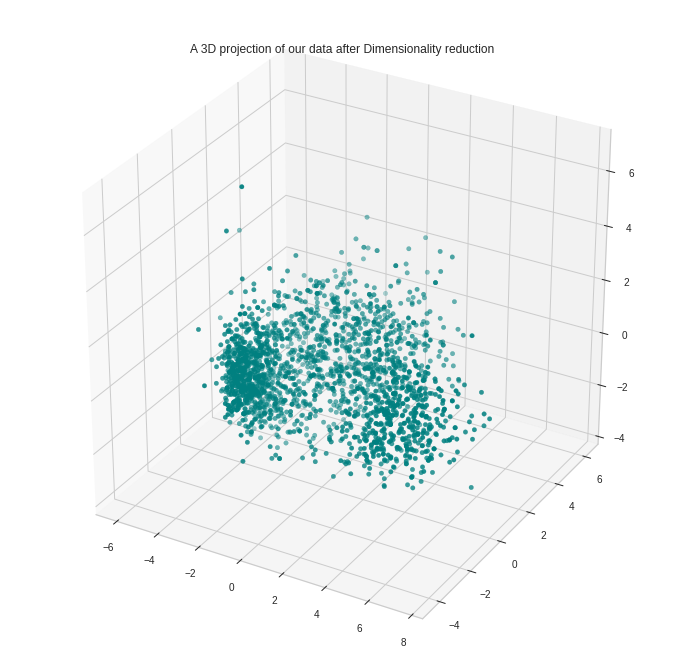

In [87]:
# Plot data
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(x, y, z, c='teal', marker='o')
ax.set_title("A 3D projection of our data after Dimensionality reduction")
plt.show()

# Clustering

1. Determine the amount of clustres
2. Clustering
3. Examine plotted clusters 

We don't know the true distribution of target variable so that we can relate the task to **"Unsupervised Clustering"** - our model will need to find the relations in data. The main problem is that we don't know the amount of clusters and to specify it two methods will be used: **"Elbow method"** and **"Silhouette method"**

In [32]:
!pip install yellowbrick

     |████████████████████████████████| 274 kB 4.0 MB/s 


In [88]:
from sklearn.cluster import KMeans 
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score

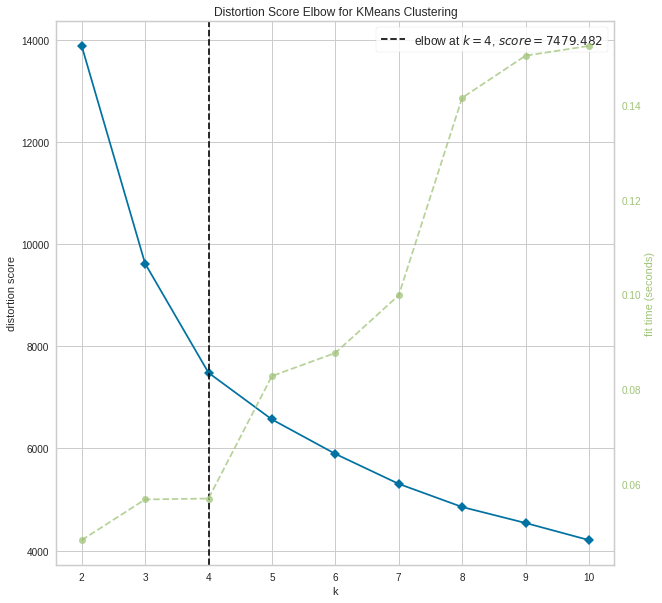

In [89]:
# Elbow method
plt.figure(figsize = (10,10))
elbow_metric = KElbowVisualizer(KMeans(), k=10)
elbow_metric.fit(principal_data)
elbow_metric.show()

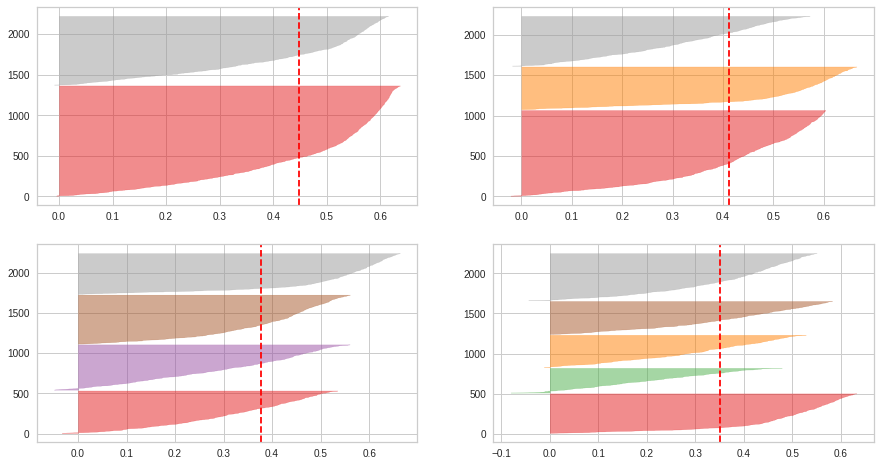

In [90]:
from yellowbrick.cluster.silhouette import SilhouetteVisualizer
# Silhouette method
fig, ax = plt.subplots(2, 2, figsize=(15,8))
number_of_clusters = [2, 3, 4, 5]
for number in number_of_clusters:
  quotient, remainder = divmod(number, 2)
  k_means = KMeans(n_clusters=number, init="k-means++", max_iter=100, random_state=42)
  silhouette = SilhouetteVisualizer(k_means, ax=ax[quotient-1][remainder])
  silhouette.fit(principal_data)
  k_means.fit_predict(principal_data)

Both methods show us that **4 clusters** is the optimal option of all possible: 
1. Elbow methods says that "4 clusters" option has the best score out of every other ones
2. Silhouettes of 4 clusters have approximatelly the same size - that makes more sense than lots of small clusters or a few big ones

To get the final clusters I will be using **Agglomerative Clustering model** - one of the **Hierarchical Clustering models**

In [36]:
from sklearn.cluster import AgglomerativeClustering

In [91]:
# init the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit our data and make prediction
y_pred = AC.fit_predict(principal_data)
principal_data["Clusters"] = y_pred
# also let's add the feature to original data
data["Clusters"] = y_pred
principal_data.head()

,PC_1,PC_2,PC_3,Clusters
0,5.040259,-0.167535,2.668748,2
1,-2.883343,0.009947,-1.881861,1
2,2.627997,-0.722714,-0.284369,2
3,-2.705840,-1.545399,-0.948946,3
4,-0.640438,0.231160,0.005835,1


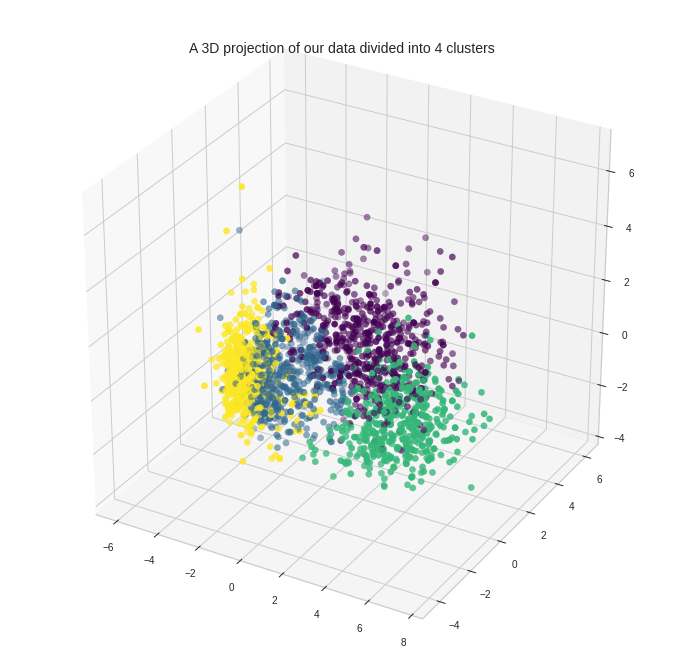

In [92]:
fig = plt.figure(figsize=(12,12))
ax = plt.subplot(111, projection='3d', label="bla")

ax.scatter(x, y, z, s=40, c=principal_data["Clusters"], marker='o', cmap="viridis")
ax.set_title("A 3D projection of our data divided into 4 clusters", fontsize = 14)
plt.show()

# Exploring the clusters 

We've done with **unsupervised clustering**, but there is one problem - as our original dataset hasn't a tagged feature, we cannot compute the score of our model. Because of that I will find the patterns and relations by myself to find out the clusters' nature. To achieve our goal, data could be projected on different feature with respect to tagged feature

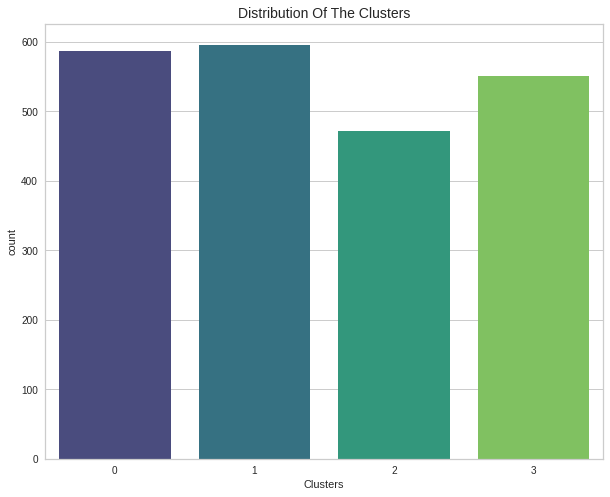

In [93]:
# distribution of clusters : are they fairly distributed ?
plt.figure(figsize=(10,8))
count_plot = sns.countplot(x=data["Clusters"], palette="viridis")
count_plot.set_title("Distribution Of The Clusters", fontsize=14)
plt.show()

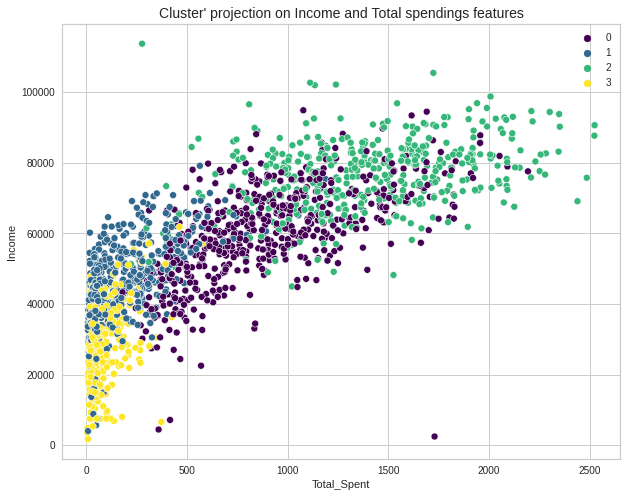

In [94]:
# distribution of clusters respectively to Income and Age
plt.figure(figsize=(10,8))
spent_income = sns.scatterplot(data=data, x=data["Total_Spent"], y=data["Income"], hue=data["Clusters"], palette="viridis")
spent_income.set_title("Cluster' projection on Income and Total spendings features", fontsize=14)
plt.legend()
plt.show()

What can we say about clusters now?

*   **Cluster 0:** high spendings and average income 
*   **Cluster 1:** low spendings and average income
*   **Cluster 2:** high spendings and high income
*   **Cluster 3:** low spendings and low income

Now, I want to look at spendings distribution with a broader view - through the **Boxen-plots** (it can tell us about the shape of feature's distribution)



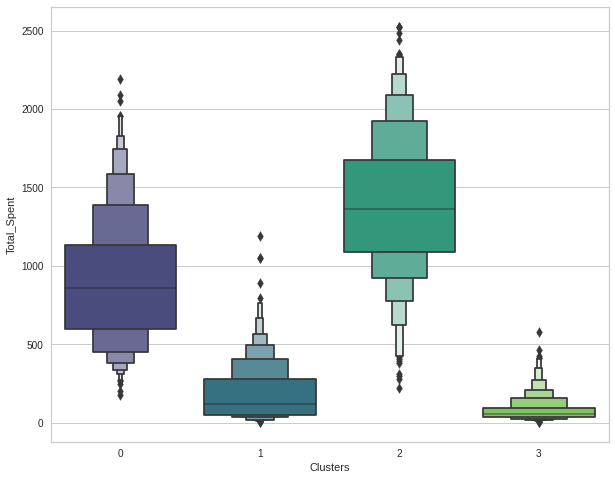

In [95]:
plt.figure(figsize=(10,8))
swarm_boxen = sns.boxenplot(x=data["Clusters"], y=data["Total_Spent"], palette="viridis")
plt.show()

Now, I'll look at the marketing campaign for each cluster from different fields of view: firstly, I'll look at the amount of accepted promotions. Secondly - the number of deals purchased by customers

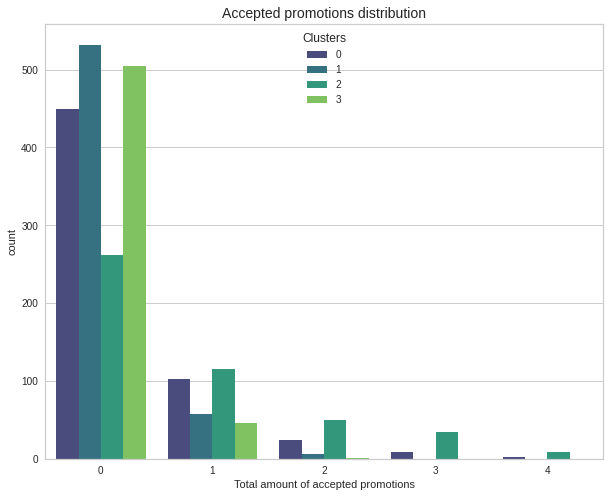

In [96]:
# Construct a new feature to make things easier
plt.figure(figsize=(10,8))
data["Total_Promotions"] = data["AcceptedCmp1"] + data["AcceptedCmp2"] + data["AcceptedCmp3"] + data["AcceptedCmp4"] + data["AcceptedCmp5"]
count_promotions = sns.countplot(x=data["Total_Promotions"], hue=data["Clusters"], palette="viridis")
count_promotions.set_xlabel("Total amount of accepted promotions")
count_promotions.set_title("Accepted promotions distribution", fontsize=14)
plt.show()

As we can see, there is a very little response from the customers to the marketing campaign (almost no one took a part in all the campaigns) - there are a few solutions, which can be valuable, but I'll write about it later. Now, I want to look at the number of deals purchased by customers

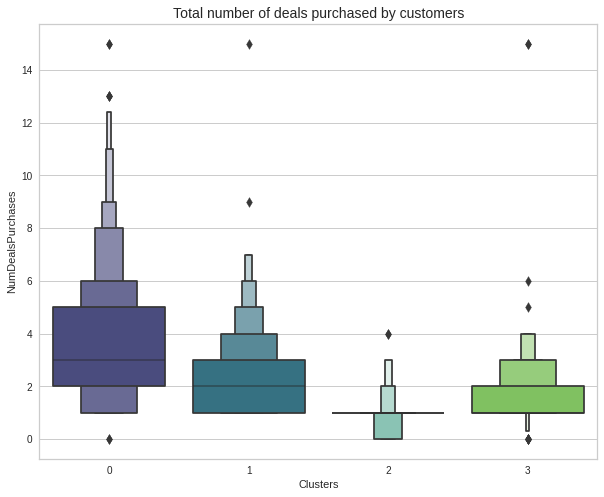

In [97]:
plt.figure(figsize=(10,8))
deals_boxen = sns.boxenplot(x=data["Clusters"], y=data["NumDealsPurchases"],palette="viridis")
deals_boxen.set_title("Total number of deals purchased by customers", fontsize=14)
plt.show()

In contrast with marketing campaign, the deals made by customers have a good distribution: it's clearly seen that **0 cluster** gives the best outcome to the company and **1 cluster** is also doing great, but **2 and 3 clusters** are not really interested - they are not much in the deals

Talking of the marketing strategy and it's possible improvements, a better-targeted and well-planned marketing will help. Knowing more about clusters and it's customer age groups, marital status and so on can give some ideas. It's the next step of personality analysis. 

What if we look at the relations between personality features respectivelly to customers' **cluster_id**?

In [44]:
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

<Figure size 576x396 with 0 Axes>

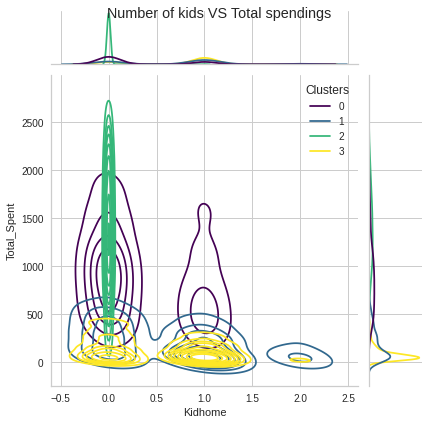

In [98]:
# distribution of clusters : Kidhome vs Spendings
plt.figure()
sns.jointplot(x=data["Kidhome"], y=data["Total_Spent"], hue=data["Clusters"], kind="kde", palette="viridis").fig.suptitle('Number of kids VS Total spendings')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 576x396 with 0 Axes>

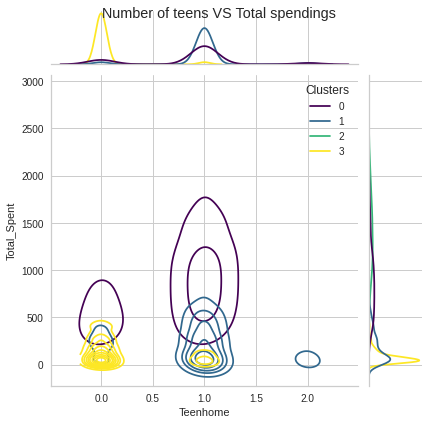

In [99]:
# distribution of clusters : Teenhome vs Spendings
plt.figure()
sns.jointplot(x=data["Teenhome"], y=data["Total_Spent"], hue=data["Clusters"], kind="kde", palette="viridis").fig.suptitle('Number of teens VS Total spendings')
plt.show()

<Figure size 576x396 with 0 Axes>

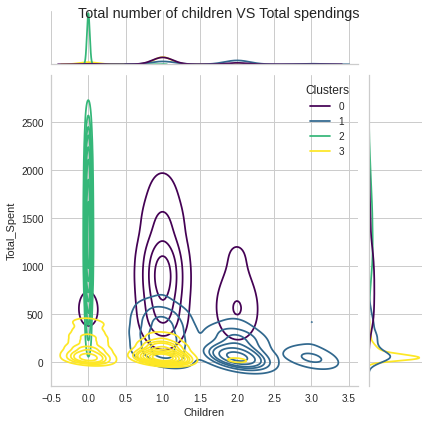

In [100]:
# distribution of clusters : Children vs Spendings
plt.figure()
sns.jointplot(x=data["Children"], y=data["Total_Spent"], hue=data["Clusters"], kind="kde", palette="viridis").fig.suptitle('Total number of children VS Total spendings')
plt.show()

<Figure size 576x396 with 0 Axes>

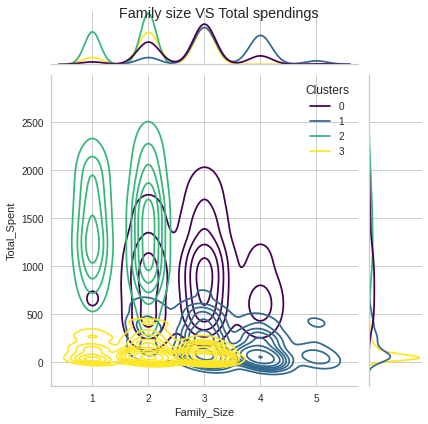

In [101]:
# distribution of clusters : Family size vs Spendings
plt.figure()
sns.jointplot(x=data["Family_Size"], y=data["Total_Spent"], hue=data["Clusters"], kind="kde", palette="viridis").fig.suptitle('Family size VS Total spendings')
plt.show()

<Figure size 576x396 with 0 Axes>

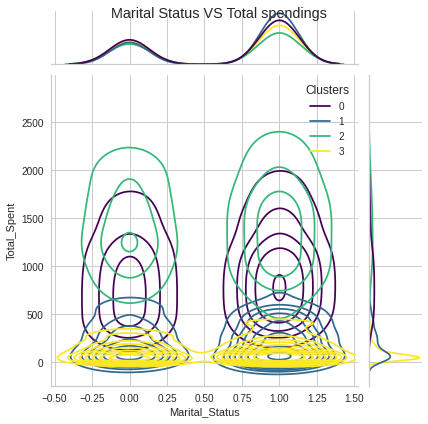

In [106]:
# distribution of clusters : Marital Status vs Spendings
plt.figure()
sns.jointplot(x=data["Marital_Status"], y=data["Total_Spent"], hue=data["Clusters"], kind="kde", palette="viridis").fig.suptitle('Marital Status VS Total spendings')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 576x396 with 0 Axes>

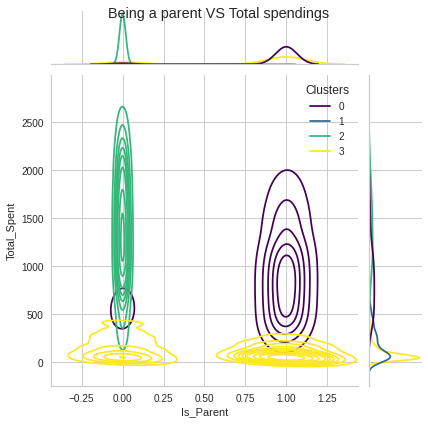

In [102]:
# distribution of clusters : Is Parent  vs Spendings
plt.figure()
sns.jointplot(x=data["Is_Parent"], y=data["Total_Spent"], hue=data["Clusters"], kind="kde", palette="viridis").fig.suptitle('Being a parent VS Total spendings')
plt.show()

What can we say now? 

1. From the last Joint-plot we can definitely conclude that **0 cluster** cunstomers are certainly parents. Their family has max size of 4 and min size of 2. They mostly have 1 child (but there are customers of this cluster with 0 and 2 children too) and that child is a teenager usually. There is a *Single parent* subset in this group (distributions are nearly equal)

2. Talking of the **1 cluster** customers, as we can see on "Marital Status VS Total spendings" plot the majority of them are not single (but the size of groups are nearly equal) and size of their family varies from 2 to 5 people (and, consequently from 1 to 3 children). Almost everyone has a teenager child and a kid

3. **2 cluster** are definitely not parents. A slight majority of customers from this group are not alone and have a partner and consequently their family size varies from 1 to 2. And, obviously, thet don't have any children

4. The majority of **3 cluster** customers are parents with the max family size of 3 people. Taking into account the marital status, mostly they have a partner and, consequently, only 1 child (not a teenager usually)

Now let's look at more personal features like "Age", "Education" and etc.

<Figure size 576x396 with 0 Axes>

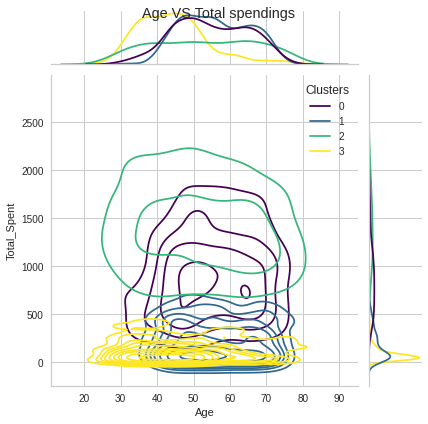

In [110]:
# distribution of clusters : Age vs Spendings
plt.figure()
sns.jointplot(x=data["Age"], y=data["Total_Spent"], hue=data["Clusters"], kind="kde", palette="viridis").fig.suptitle('Age VS Total spendings')
plt.show()

<Figure size 576x396 with 0 Axes>

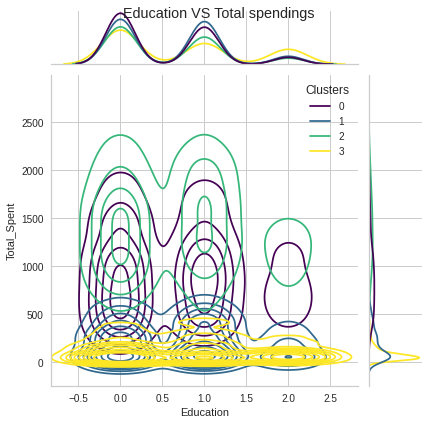

In [105]:
# distribution of clusters : Education vs Spendings
plt.figure()
sns.jointplot(x=data["Education"], y=data["Total_Spent"], hue=data["Clusters"], kind="kde", palette="viridis").fig.suptitle('Education VS Total spendings')
plt.show()

<Figure size 576x396 with 0 Axes>

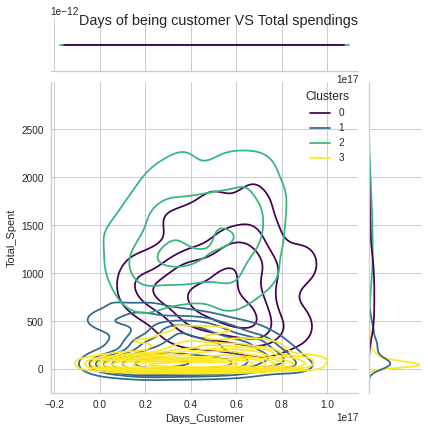

In [112]:
# distribution of clusters : Days of being customer vs Spendings
plt.figure()
sns.jointplot(x=data["Days_Customer"], y=data["Total_Spent"], hue=data["Clusters"], kind="kde", palette="viridis").fig.suptitle('Days of being customer VS Total spendings')
plt.show()

Looking at personal features:

1. **0 Cluster** customers are relatively older. Usually they are middle-aged. Also in most of the cases they have a Postgraduate and Graduate education (proportions are nearly equal)

2. **1 Cluster** is very similar to the *0 cluster* from this point of view. Customers are relatively older too and usually they have a Postgraduate and Graduate education.

3. **2 Cluster** is more widespread - customers span all the possible age-groups and education-groups (but Postgraduate and Graduate are more common)

4. **3 Cluster** customers are relatively younger than the others and their education levels are nearly equally distributed (but Graduate-level occurs slightly more often)


# Сonclusion

In this notebook data engineering, dimensionality reduction and unsupervised clustering was done. After that I came up with 4 clusters and analysed them through customer's purchasing habits, family structures and personal characteristics. 

---

**0 Cluster:**
*   Certainly parents
*   Their family has max size of 4 and min size
of 2
*   Mostly have 1 child and that child is a teenager usually
*   There is a Single parent subset in this group
*   Relatively older (usually they are middle-aged)
*   Postgraduate and Graduate education (proportions are nearly equal)
*   High spendings and average income
*   The biggest number of successful deals

**1 Cluster:**
*   The majority of them are not single (but the size of groups are nearly equal)
*   Size of their family varies from 2 to 5 people
*   From 1 to 3 children
*   Almost everyone has a teenager child and a kid
*   Relatively older
*   Postgraduate and Graduate education (proportions are nearly equal)
*   Low spendings and average income
*   Good number of successful deals

**2 Cluster:**
*   Are definitely not parents
*   A slight majority of customers from this group are not alone and have a partner
*   Their family size varies from 1 to 2
*   Don't have any children
*   Span all the possible age-groups
*   Span all the possible education-groups (but Postgraduate and Graduate are more common)
*   High spendings and high income
*   The least number of successful deals (almost zero deals)

**3 Cluster:**
*   The majority of them are parents
*   With the max family size of 3 people
*   In most of the cases, have a partner
*   Have only 1 child (not a teenager usually)
*   Relatively younger than the others
*   Education levels are nearly equally distributed (but Graduate-level occurs slightly more often)
*   Low spendings and low income
*   Small number of successful deals

---

Also some possible improvements were suggested. All of that can be used in marketing campaign planning.

# Have a good day! 

